/var/folders/bw/2gpjdk9513ld5ztszs8b000m0000gn/T/ipykernel_10750/4232852353.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2010-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.431896  6.446622  6.382907  6.414464  493729600
2010-01-05  6.443017  6.479383  6.409056  6.449630  601904800
2010-01-06  6.340532  6.468563  6.333920  6.443017  552160000
2010-01-07  6.328810  6.371488  6.282827  6.363974  477131200
2010-01-08  6.370887  6.371488  6.283129  6.320396  447610800


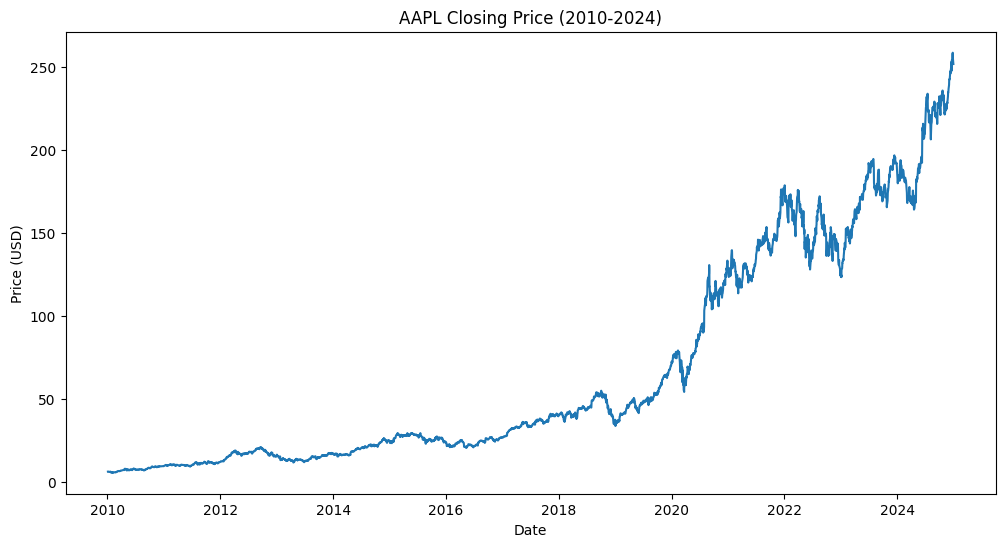

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download AAPL stock data
ticker = "AAPL"
data = yf.download(ticker, start="2010-01-01", end="2024-12-31")

# Save raw data to CSV for backup
data.to_csv("../data/aapl_raw.csv")

# Quick view of data
print(data.head())

# Basic plot of Closing Price
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title(f"{ticker} Closing Price (2010-2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [7]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3773 entries, 2010-01-04 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3773 non-null   float64
 1   (High, AAPL)    3773 non-null   float64
 2   (Low, AAPL)     3773 non-null   float64
 3   (Open, AAPL)    3773 non-null   float64
 4   (Volume, AAPL)  3773 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,67.384922,68.038019,66.661499,67.328267,2.299705e+08
std,65.458097,66.066089,64.759818,65.377731,2.180794e+08
min,5.771909,5.890619,5.717810,5.781522,2.323470e+07
25%,17.438065,17.616165,17.293178,17.438645,8.492380e+07
50%,35.238152,35.654099,34.916134,35.290553,1.405608e+08
75%,126.721428,127.807653,124.474418,126.025083,3.081512e+08
max,258.396667,259.474086,257.010028,257.568678,1.880998e+09


In [8]:
print(data.isna().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [16]:
import pandas_ta as ta

# Load CSV properly
data = pd.read_csv('../data/aapl_raw.csv', index_col=0, parse_dates=True)

# Flatten columns if they're multi-indexed
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

# Make sure all values are numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Now add technical indicators
data['EMA_20'] = ta.ema(data['Close'], length=20)
data['EMA_50'] = ta.ema(data['Close'], length=50)
data['RSI_14'] = ta.rsi(data['Close'], length=14)

# Drop rows with missing values
data.dropna(inplace=True)

# Save processed data
data.to_csv('../data/aapl_with_indicators.csv')

# Quick check
print(data.tail())


                 Close        High         Low        Open      Volume  \
Price                                                                    
2024-12-23  254.655716  255.034791  252.840088  254.156919  40858800.0   
2024-12-24  257.578674  257.588630  254.675658  254.875189  23234700.0   
2024-12-26  258.396667  259.474086  257.010028  257.568678  27237100.0   
2024-12-27  254.974930  258.077462  252.451019  257.209530  42355300.0   
2024-12-30  251.593094  252.889969  250.146586  251.623020  35557500.0   

                EMA_20      EMA_50     RSI_14  
Price                                          
2024-12-23  244.863959  236.921649  73.085638  
2024-12-24  246.074885  237.731729  75.750272  
2024-12-26  247.248388  238.542118  76.452864  
2024-12-27  247.984249  239.186542  67.626262  
2024-12-30  248.327948  239.673074  60.225588  


/var/folders/bw/2gpjdk9513ld5ztszs8b000m0000gn/T/ipykernel_10750/2098544335.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('../data/aapl_raw.csv', index_col=0, parse_dates=True)


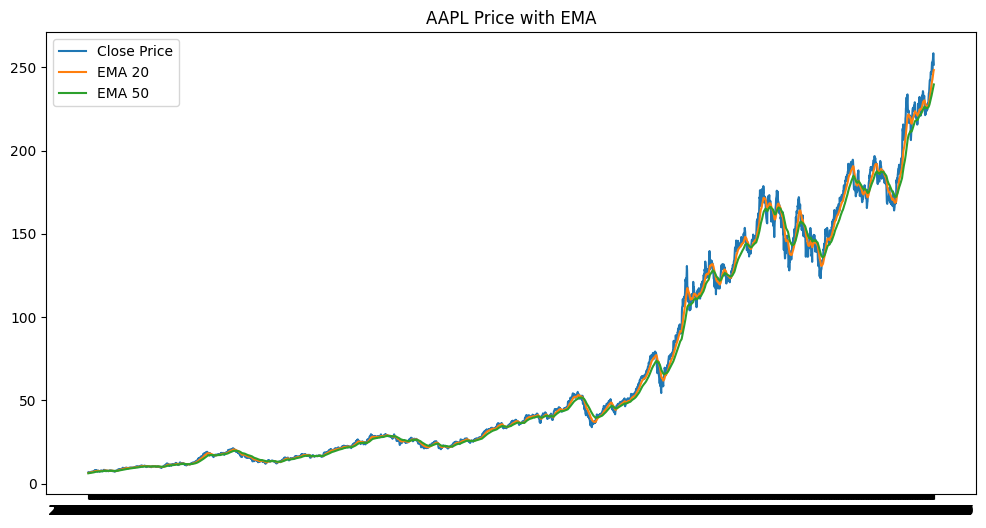

In [17]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['EMA_20'], label='EMA 20')
plt.plot(data['EMA_50'], label='EMA 50')
plt.title("AAPL Price with EMA")
plt.legend()
plt.show()


In [18]:
data.dropna(inplace=True)

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [21]:
features = ['Close', 'EMA_20', 'EMA_50', 'RSI_14']
data = data[features]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [22]:
def create_sequences(data, sequence_length=60):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i][0])  # index 0 because 'Close' is the first column
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (3666, 60, 4), y shape: (3666,)


In [23]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2025-06-18 15:46:07.930750: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
def build_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define parameter grid
units_list = [50, 64, 100]
dropout_list = [0.2, 0.3]
batch_size_list = [16, 32]
epochs = 50  # keep epochs fixed for now

# Store results
results = []

for units in units_list:
    for dropout in dropout_list:
        for batch_size in batch_size_list:
            print(f"Training model: units={units}, dropout={dropout}, batch_size={batch_size}")
            
            model = build_lstm_model(units=units, dropout_rate=dropout)
            
            history = model.fit(X_train, y_train, 
                                epochs=epochs, 
                                batch_size=batch_size, 
                                validation_split=0.1,
                                verbose=0)
            
            # Predict on test set
            y_pred = model.predict(X_test)
            
            # Inverse transform for evaluation
            y_pred_scaled = np.zeros((len(y_pred), data.shape[1]))
            y_test_scaled = np.zeros((len(y_test), data.shape[1]))
            y_pred_scaled[:, 0] = y_pred[:, 0]
            y_test_scaled[:, 0] = y_test
            y_pred_actual = scaler.inverse_transform(y_pred_scaled)[:, 0]
            y_test_actual = scaler.inverse_transform(y_test_scaled)[:, 0]
            
            # Calculate metrics
            mse = mean_squared_error(y_test_actual, y_pred_actual)
            mae = mean_absolute_error(y_test_actual, y_pred_actual)
            
            # Store results
            results.append({
                'units': units,
                'dropout': dropout,
                'batch_size': batch_size,
                'MSE': mse,
                'MAE': mae
            })
            
            print(f"  -> MSE: {mse:.2f}, MAE: {mae:.2f}")



Training model: units=50, dropout=0.2, batch_size=16
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
  -> MSE: 25.02, MAE: 4.14
Training model: units=50, dropout=0.2, batch_size=32


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
  -> MSE: 44.46, MAE: 5.21
Training model: units=50, dropout=0.3, batch_size=16


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
  -> MSE: 230.41, MAE: 13.80
Training model: units=50, dropout=0.3, batch_size=32


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
  -> MSE: 53.01, MAE: 5.75
Training model: units=64, dropout=0.2, batch_size=16


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
  -> MSE: 23.14, MAE: 3.66
Training model: units=64, dropout=0.2, batch_size=32


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
  -> MSE: 38.45, MAE: 5.15
Training model: units=64, dropout=0.3, batch_size=16


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
  -> MSE: 101.24, MAE: 8.75
Training model: units=64, dropout=0.3, batch_size=32


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
  -> MSE: 122.30, MAE: 10.19
Training model: units=100, dropout=0.2, batch_size=16


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
  -> MSE: 21.37, MAE: 3.75
Training model: units=100, dropout=0.2, batch_size=32


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
  -> MSE: 51.43, MAE: 6.24
Training model: units=100, dropout=0.3, batch_size=16


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
  -> MSE: 101.71, MAE: 7.99
Training model: units=100, dropout=0.3, batch_size=32


/Users/calebgomez/Desktop/Stock Price Prediction/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
  -> MSE: 54.56, MAE: 6.41


In [34]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='MSE'))

    units  dropout  batch_size         MSE        MAE
8     100      0.2          16   21.367928   3.750829
4      64      0.2          16   23.142709   3.658856
0      50      0.2          16   25.017044   4.135283
5      64      0.2          32   38.448802   5.149550
1      50      0.2          32   44.460765   5.211772
9     100      0.2          32   51.431793   6.244784
3      50      0.3          32   53.010467   5.746047
11    100      0.3          32   54.560557   6.414030
6      64      0.3          16  101.244756   8.750428
10    100      0.3          16  101.711736   7.992195
7      64      0.3          32  122.295797  10.192327
2      50      0.3          16  230.409322  13.804962
